In [1]:
import sys
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../')
import utils.shp as shp

In [2]:
PATH = 'D:\\Deutschland\\FUB\\master_thesis\\data\\Reference_data'
REF_DIR = 'D:\\Deutschland\\FUB\\master_thesis\\data\\ref'
VAL_DIR = os.path.join(PATH, 'validation')
in_path = os.path.join(PATH, 'bw_part_polygons', 'inpolysites_pure.shp')
val_path = os.path.join(VAL_DIR, 'Objectbased_classification_regression_validation2.shp')
out_path = os.path.join(PATH, 'bw_part_polygons', 'inpolysites_pure.shp')
ref_path = os.path.join(REF_DIR, 'validation', 'reference_val_pure.csv')

In [3]:
polygons = shp.load_shp_file(in_path)
polygons

import file D:\Deutschland\FUB\master_thesis\data\Reference_data\bw_part_polygons\inpolysites_pure.shp


,BST1_BA_1,BST1_BA_2,BST1_BA_3,BST1_BA_4,BST1_BA_5,BST1_BA_6,BST1_BA_7,BST1_BA_8,BST1_BAA_1,BST1_BAA_2,...,BST3_BAA_1,BST3_BAA_2,BST3_BAA_3,BST3_BAA_4,BST3_BAA_5,BST3_BAA_6,BST3_BAA_7,BST3_BAA_8,id,geometry
0,310,110,220,120,210,0,0,0,90,10,...,0,0,0,0,0,0,0,0,11,"POLYGON ((8.06919 48.45149, 8.06919 48.45147, ..."
1,110,710,210,930,874,0,0,0,90,5,...,0,0,0,0,0,0,0,0,49,"POLYGON ((8.21059 48.54966, 8.21059 48.54965, ..."
2,110,210,310,710,0,0,0,0,90,10,...,0,0,0,0,0,0,0,0,57,"POLYGON ((8.18862 48.55293, 8.18911 48.55303, ..."
3,110,210,930,874,410,710,0,0,95,5,...,0,0,0,0,0,0,0,0,58,"POLYGON ((8.20392 48.55121, 8.20368 48.55111, ..."
4,110,210,630,821,330,710,0,0,90,10,...,0,0,0,0,0,0,0,0,62,"POLYGON ((8.25697 48.44011, 8.25708 48.44115, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,110,710,0,0,0,0,0,0,95,5,...,0,0,0,0,0,0,0,0,10980,"POLYGON ((9.53202 49.08693, 9.53204 49.08698, ..."
1668,310,979,600,630,710,0,0,0,90,10,...,0,0,0,0,0,0,0,0,10989,"POLYGON ((9.71320 49.03380, 9.71323 49.03382, ..."
1669,110,710,410,0,0,0,0,0,100,0,...,0,0,0,0,0,0,0,0,11011,"POLYGON ((9.72021 49.03933, 9.72032 49.03934, ..."
1670,710,979,110,0,0,0,0,0,90,10,...,0,0,0,0,0,0,0,0,11016,"POLYGON ((9.61386 49.06375, 9.61388 49.06377, ..."


In [9]:
class_map = {110:'Spruce', 210:'Sliver Fir', 310:'Douglas Fir', 410:'Pine', 
            600:'Oak', 710:'Beech', 821:'Sycamore', 831:'Ash'}
polygons['class'] = polygons['BST1_BA_1'].map(class_map)
polygons

,BST1_BA_1,BST1_BA_2,BST1_BA_3,BST1_BA_4,BST1_BA_5,BST1_BA_6,BST1_BA_7,BST1_BA_8,BST1_BAA_1,BST1_BAA_2,...,BST3_BAA_2,BST3_BAA_3,BST3_BAA_4,BST3_BAA_5,BST3_BAA_6,BST3_BAA_7,BST3_BAA_8,id,geometry,class
0,310,110,220,120,210,0,0,0,90,10,...,0,0,0,0,0,0,0,11,"POLYGON ((8.06919 48.45149, 8.06919 48.45147, ...",Douglas Fir
1,110,710,210,930,874,0,0,0,90,5,...,0,0,0,0,0,0,0,49,"POLYGON ((8.21059 48.54966, 8.21059 48.54965, ...",Spruce
2,110,210,310,710,0,0,0,0,90,10,...,0,0,0,0,0,0,0,57,"POLYGON ((8.18862 48.55293, 8.18911 48.55303, ...",Spruce
3,110,210,930,874,410,710,0,0,95,5,...,0,0,0,0,0,0,0,58,"POLYGON ((8.20392 48.55121, 8.20368 48.55111, ...",Spruce
4,110,210,630,821,330,710,0,0,90,10,...,0,0,0,0,0,0,0,62,"POLYGON ((8.25697 48.44011, 8.25708 48.44115, ...",Spruce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,110,710,0,0,0,0,0,0,95,5,...,0,0,0,0,0,0,0,10980,"POLYGON ((9.53202 49.08693, 9.53204 49.08698, ...",Spruce
1668,310,979,600,630,710,0,0,0,90,10,...,0,0,0,0,0,0,0,10989,"POLYGON ((9.71320 49.03380, 9.71323 49.03382, ...",Douglas Fir
1669,110,710,410,0,0,0,0,0,100,0,...,0,0,0,0,0,0,0,11011,"POLYGON ((9.72021 49.03933, 9.72032 49.03934, ...",Spruce
1670,710,979,110,0,0,0,0,0,90,10,...,0,0,0,0,0,0,0,11016,"POLYGON ((9.61386 49.06375, 9.61388 49.06377, ...",Beech


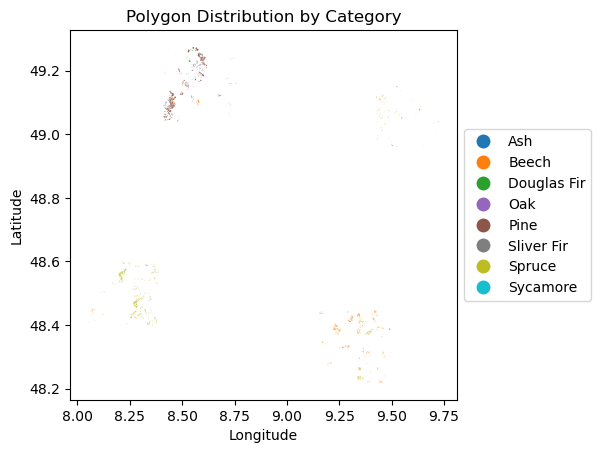

In [10]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot all the polygons
polygons.plot(ax=ax, column='class', legend=True, categorical = True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

# Set the title and axis labels
ax.set_title("Polygon Distribution by Category")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()